## Classificação de Imagens Usando o Dataset Mnist: Imagens de de dígitos  manuscritos

### Importando libs  e funções

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt

### Etapa de exploração e tratamento dos dados

Importando os dados.
Fonte: [MNIST](https://www.openml.org/d/554)

In [3]:
mnist_data = load_digits()

mnist_data.data.shape

(1797, 64)

Definindo e visualizando Variáveis:

In [0]:
X, y, images = mnist_data["data"], mnist_data["target"], mnist_data["images"]

As features são compostas de imagens 8x8 de dígitos.  Observe que cada imagem tem o mesmo tamanho e que as features são compostas de valores entre 0 e 15 que  consiste na escala de cinza de cada pixel na imagen, assim totalizando 64 features - 8x8:

In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

A variável dependente consiste dos valores dos dígitos: entre 0 e 9

In [6]:
y[0]

0

Visualizando os valores e imagem de digito qualquer usando o matplotlib:

<Figure size 432x288 with 0 Axes>

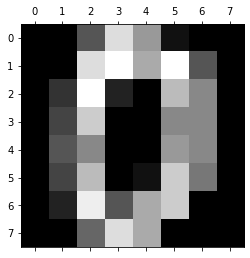

In [7]:
plt.gray() 
plt.matshow(mnist_data.images[0]) 
plt.show()

### Etapa de treinamento e avaliação do modelo

Dividindo os dados:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Treinando o algoritmo Naive Bayes:

In [12]:
classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predizendo os valores dos cojuntos de teses:

In [0]:
y_pred = classifier.predict(X_test)

Relatório das metricas de classificação:

In [13]:
print("Relatório de Classificação do SVC: %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Relatório de Classificação do SVC: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.98      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0

Matriz de Confusão:

In [14]:
metrics.confusion_matrix(y_test, y_pred)


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 66,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 57]])